# 対数変換

目的変数や説明変数を対数変換すると、推定結果の解釈が変わる


| モデル                                | 係数の解釈                                                 |
| ------------------------------------- | ---------------------------------------------------------- |
| $Y = \beta_0 + \beta_1 X$             | 「$X$が1単位増加すると，$Y$が$\beta_1$単位増加する」       |
| $Y = \beta_0 + \beta_1 \ln(X)$       | 「$X$が1%増加すると，$Y$が$\beta_1 / 100$単位増加する」 |
| $\ln(Y) = \beta_0 + \beta_1 X$       | 「$X$が1単位増加すると，$Y$が$(\beta_1 \times 100)$%増加する」 |
| $\ln(Y) = \beta_0 + \beta_1 \ln(X)$ | 「$X$が1%増加すると，$Y$が$\beta_1$%増加する」             |


次のようなデータを使って実際にモデルをあてはめつつ確認していく

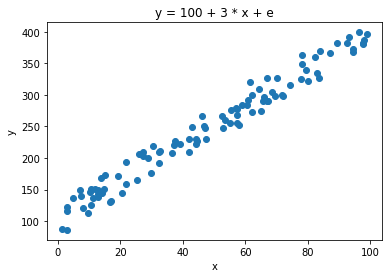

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf


# 真のデータ生成過程
n = 100
np.random.seed(0)
x = np.random.uniform(1, 100, size=n)
x = np.sort(x)
e = np.random.normal(loc=0, scale=15, size=n)
beta0 = 100
beta1 = 3
y = beta0 + beta1 * x + e

df = pd.DataFrame({"y": y, "x": x})
plt.scatter(x, y)
plt.xlabel("x")
plt.ylabel("y")
plt.title(f"y = {beta0} + {beta1} * x + e")
plt.show()



#### (1) $Y = \beta_0 + \beta_1 X$

Xを1単位増加させたモデルとそうでないモデルで差分をとってみると

$$
\begin{align}
Y_1 &= \beta_0 + \beta_1 X\\
Y_2 &= \beta_0 + \beta_1 (X + 1)\\
    &= \beta_0 + \beta_1 X + \beta_1\\
Y_2 - Y_1 &= \beta_1
\end{align}
$$

であるため、「$X$が1単位増加すると、$Y$が$\beta_1$単位増加する」という解釈になる



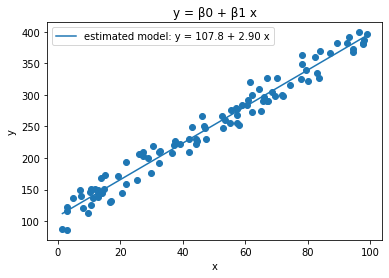

In [2]:
model = smf.ols('y ~ x', data=df).fit()
beta = model.params.to_list()

y_pred = model.predict(df[["x"]])

fig, ax = plt.subplots()
ax.scatter(x, y)
ax.set(xlabel="x", ylabel="y", title="y = β0 + β1 x")
ax.plot(x, y_pred, label=f"estimated model: y = {beta[0]:.1f} + {beta[1]:.2f} x")
ax.legend()
fig.show()


#### (2) $Y = \beta_0 + \beta_1 \ln(X)$

$$
\begin{align}
Y_1 &= \beta_0 + \beta_1 \ln(X)\\
Y_2 &= \beta_0 + \beta_1 \ln(1.01X)\\
    &= \beta_0 + \beta_1 \ln (X) + \beta_1 \ln(1.01) \\
Y_2 - Y_1 &= \beta_1 \ln(1.01)
\end{align}
$$

$\ln(1.01) \approx 0.01$なので

$$
Y_2 - Y_1 = \beta_1 \ln(1.01) \approx 0.01\beta_1
$$

「$X$が1%増加すると、$Y$が$\beta_1 / 100$単位増加する」となる

:::{dropdown} $\ln(1.01) \approx 0.01$について

$\ln(1.01) \approx 0.01$はテイラー近似から導出される。まずテイラー近似について述べる

$f(x)=\ln(x+1)$とおくと、その$n$次の微分は

$$
f^{(n)}(x) = (-1)^{n-1} \frac{(n-1)!}{(x+1)^n}
$$

となる。もし$x=0$なら

$$
f^{(n)}(0) = (-1)^{n-1} \frac{(n-1)!}{(1)^n} = (-1)^{n-1} (n-1)!
$$

となる。

これを$x=0$でのテイラー展開（つまりマクローリン展開）

$$
\sum^{\infty}_{n=0} \frac{f^{(n)}(0)}{n!}x^n = f(0) + f'(0) x + \frac{f^{(2)}(0)}{2!}x^2 + \cdots
$$

にあてはめると、

$$
\ln(1 + x) = x - \frac{x^2}{2} + \frac{x^3}{3} - \frac{x^4}{4} + \cdots
$$

となる。これは$x$が極めて小さな値（$x \approx 0$）であれば$x^2$や$x^3$といった値は非常に小さくなるため、$\ln(1+x) \approx x$となる。

よって$\ln( 1 + 0.01) \approx 0.01$となる


数値計算的に確かめると、以下のようになる

```{code-cell} ipython3
import numpy as np
x = 0.01
print(f"log: {np.log(1 + x):.7f}")
print(f"approx 1: {x:.7f}")
print(f"approx 2: {x - (x**2 / 2):.7f}")
print(f"approx 3: {x - (x**2 / 2) + (x**3 / 3):.7f}")
```

```
log: 0.0099503
approx 1: 0.0100000
approx 2: 0.0099500
approx 3: 0.0099503
```

:::

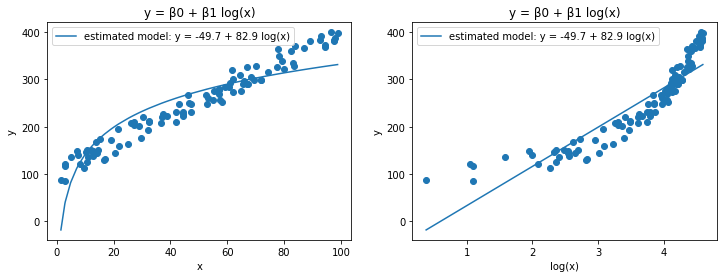

In [3]:
model = smf.ols('y ~ np.log(x)', data=df).fit()
beta = model.params.to_list()
y_pred = model.predict(df[["x"]])

fig, axes = plt.subplots(ncols=2, figsize=[12, 4])
axes[0].scatter(x, y)
axes[0].set(xlabel="x", ylabel="y", title="y = β0 + β1 log(x)")
axes[0].plot(x, y_pred, label=f"estimated model: y = {beta[0]:.1f} + {beta[1]:.3g} log(x)")
axes[0].legend()

axes[1].scatter(np.log(x), y)
axes[1].set(xlabel="log(x)", ylabel="y", title="y = β0 + β1 log(x)")
axes[1].plot(np.log(x), y_pred, label=f"estimated model: y = {beta[0]:.1f} + {beta[1]:.3g} log(x)")
axes[1].legend()

fig.show()

In [4]:
np.log(1.01)

0.009950330853168092

In [5]:
x0 = 50
y1 = beta[0] + beta[1] * np.log(x0)
y2 = beta[0] + beta[1] * np.log(x0 * 1.01)
print(f"xが1%増加したときのyの増分 = {y2 - y1:.3f}")

xが1%増加したときのyの増分 = 0.825


$\ln(1.01) \approx 0.01$の近似誤差が多少あるが、おおむね「$X$が1%増加すると、$Y$が$\beta_1 / 100$単位増加する」という関係になる。

#### (3) $\ln(Y) = \beta_0 + \beta_1 X$


$$
\begin{align}
Y_1 &= \exp(\beta_0 + \beta_1 X)\\
Y_2 &= \exp(\beta_0 + \beta_1 (X + 1))\\
    &= \exp(\beta_0 + \beta_1 X + \beta_1)
\end{align}
$$

$X$を1単位増やしたときの$Y$の変化率は

$$
\begin{align}
\frac{Y_2 - Y_1}{Y_1}
= \frac{Y_2}{Y_1} - 1
&= \frac{\exp(\beta_0) \exp(\beta_1 X) \exp(\beta_1)}
{\exp(\beta_0) \exp(\beta_1 X)} - 1\\
&= \exp(\beta_1) - 1\\
\end{align}
$$

$\beta_1$が十分に小さいとき、$\exp(\beta_1) - 1 \approx \beta_1$

そのため$X$が1単位増えると、$Y$は$\exp(\beta_1) - 1 \approx \beta_1$％増える


「$X$が1単位増加すると、$Y$が$(\beta_1 \times 100)$%増加する」


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

betas = np.linspace(0.01, 1, 100)
appxs = [np.exp(b) - 1 for b in betas]

fig, axes = plt.subplots(ncols=2, figsize=(12, 4))
axes[0].plot(betas, betas, label=r"$\beta$")
axes[0].plot(betas, appxs, label=r"$\exp(\beta) - 1$")
axes[0].set(title=r"$\exp(\beta) - 1 \approx \beta$", xlabel=r"$\beta$", ylim=(0, 1.8), xlim=(0, 1))
axes[0].legend()
axes[0].grid(True)

axes[1].plot(betas, appxs - betas)
axes[1].set(title=r"approximation error: $(\exp(\beta) - 1) - \beta$", xlabel=r"$\beta$", xlim=(0, 1))
axes[1].grid(True)

from myst_nb import glue
glue("fig_exp_approx", fig, display=False)

:::{note} 「十分に小さいとき」とは？

下図のように、$x$が大きくなるに連れて誤差は増える。

{glue:}`fig_exp_approx`

$x$が$0.2$であれば近似誤差は$0.02$程度となる。

$x$が$0.4$であれば近似誤差は$0.1$程度となる。

大まかな目安としては、推定量$\beta$が0.2を超えるくらいになると近似誤差に気をつけたほうがよさそう
:::

:::{note} 別の式変形のしかた

$$
\begin{align}
\ln(Y_1) &= \beta_0 + \beta_1 X\\
\ln(Y_2) &= \beta_0 + \beta_1 (X + 1)\\
         &= \beta_0 + \beta_1 X + \beta_1
\end{align}
$$

差し引きすれば

$$
\ln(Y_2) - \ln(Y_1) = \beta_1
$$

ここで$\log_a(A) - \log_a(B) = \log_a(\frac{A}{B})$より


$$
\ln \left( \frac{Y_2}{Y_1} \right) = \beta_1
$$

両辺を指数関数に入れると

$$
\frac{Y_2}{Y_1} = \exp(\beta_1)
$$

両辺から1を引けば

$$
\frac{Y_2}{Y_1} - 1 = \exp(\beta_1) - 1
$$
:::

:::{dropdown} $\exp(x) - 1 \approx x$について

$f(x)=\exp(x)$とおくと、その$n$次の微分は

$$
f^{(n)}(x) = \exp(x)
$$

となる。もし$x=0$なら

$$
f^{(n)}(0) = \exp(0) = 1
$$

となる。

これを$x=0$でのテイラー展開（つまりマクローリン展開）

$$
\sum^{\infty}_{n=0} \frac{f^{(n)}(0)}{n!}x^n = f(0) + f'(0) x + \frac{f^{(2)}(0)}{2!}x^2 + \cdots
$$

にあてはめると、

$$
\exp(x) = 1 + x + \frac{x^2}{2!} + \frac{x^3}{3!} + \frac{x^4}{4!} + \cdots
$$

となる。

$x$が極めて小さな値（$x \approx 0$）であれば$x^2$や$x^3$といった値は非常に小さくなるため、$\exp(x) \approx 1 + x$となる。

よって$\exp(x) - 1 \approx x$となる

数値計算的に確かめると、以下のようになる

```{code-cell} ipython3
import numpy as np
x = 0.1
print(f"""
x         : {x}
exp(x) - 1: {np.exp(x) - 1:.7f}

マクローリン近似
もとの値  exp(x)             = {np.exp(x):.7f}
1次近似   1 + x              = {1 + x:.7f}
2次近似   1 + x + (x^2 / 2!) = {1 + x + (x**2 / (1 * 2)):.7f}
""")
```

```
x         : 0.1
exp(x) - 1: 0.1051709

マクローリン近似
もとの値  exp(x)             = 1.1051709
1次近似   1 + x              = 1.1000000
2次近似   1 + x + (x^2 / 2!) = 1.1050000
```

:::

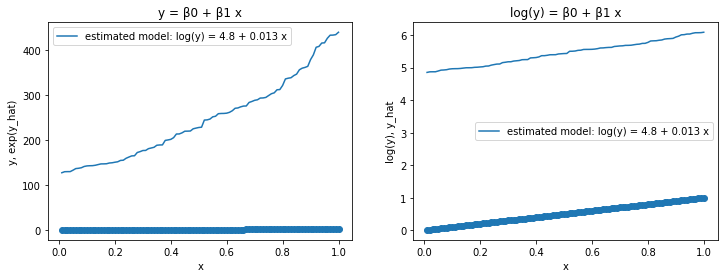

In [7]:
model = smf.ols('np.log(y) ~ x', data=df).fit()
beta = model.params.to_list()
y_pred = model.predict(df[["x"]])

fig, axes = plt.subplots(ncols=2, figsize=[12, 4])

axes[0].scatter(x, y)
axes[0].set(xlabel="x", ylabel="y, exp(y_hat)", title="y = β0 + β1 x")
axes[0].plot(x, np.exp(y_pred), label=f"estimated model: log(y) = {beta[0]:.1f} + {beta[1]:.2g} x")
axes[0].legend()

axes[1].scatter(x, np.log(y))
axes[1].set(xlabel="x", ylabel="log(y), y_hat", title="log(y) = β0 + β1 x")
axes[1].plot(x, y_pred, label=f"estimated model: log(y) = {beta[0]:.1f} + {beta[1]:.2g} x")
axes[1].legend()

fig.show()

In [8]:
x0 = 50
y1 = beta[0] + beta[1] * x0
y2 = beta[0] + beta[1] * (x0 + 1)
print(f"xが1単位増加したときのyの増分 = {y2 - y1:.3f}")

xが1単位増加したときのyの増分 = 0.013




#### (4) $\ln(Y) = \beta_0 + \beta_1 \ln(X)$

「$X$が1%増加すると、$Y$が$\beta_1$%増加する」

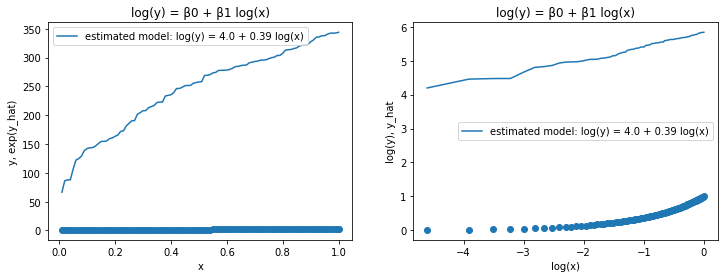

In [9]:
model = smf.ols('np.log(y) ~ np.log(x)', data=df).fit()
beta = model.params.to_list()
y_pred = model.predict(df[["x"]])

fig, axes = plt.subplots(ncols=2, figsize=[12, 4])

axes[0].scatter(x, y)
axes[0].set(xlabel="x", ylabel="y, exp(y_hat)", title="log(y) = β0 + β1 log(x)")
axes[0].plot(x, np.exp(y_pred), label=f"estimated model: log(y) = {beta[0]:.1f} + {beta[1]:.2g} log(x)")
axes[0].legend()

axes[1].scatter(np.log(x), np.log(y))
axes[1].set(xlabel="log(x)", ylabel="log(y), y_hat", title="log(y) = β0 + β1 log(x)")
axes[1].plot(np.log(x), y_pred, label=f"estimated model: log(y) = {beta[0]:.1f} + {beta[1]:.2g} log(x)")
axes[1].legend()

fig.show()

In [10]:
x0 = 50
y1 = beta[0] + beta[1] * np.log(x0)
y2 = beta[0] + beta[1] * np.log(x0 + 1)
print(f"xが1%増加したときのyの増分 = {y2 - y1:.3f}")

xが1%増加したときのyの増分 = 0.008


In [11]:
y1 = model.predict(pd.DataFrame([{"x": x0}])).to_numpy()[0]
y2 = model.predict(pd.DataFrame([{"x": x0 + 1}])).to_numpy()[0]
print(f"xが1単位増加したときのyの増分 = {y2 - y1:.3f}")

xが1単位増加したときのyの増分 = 0.008
